In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
X,y = np.loadtxt("ornek_data.txt",unpack=True)

In [11]:
X.shape,y.shape

((30,), (30,))

In [12]:
X

array([13.,  2., 14., 23., 13.,  1., 18., 10., 26.,  3.,  3., 21.,  7.,
       22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10., 21.,
        5.,  6., 13., 13.])

In [13]:
y

array([33., 16., 32., 51., 27., 16., 34., 17., 29., 15., 15., 32., 22.,
       37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27., 37.,
       17., 18., 25., 23.])

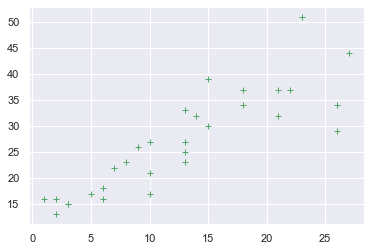

In [14]:
sns.set()
plt.plot(X,y,"g+")
plt.show()

Orjinden geçen line denklemi;

\begin{aligned}
\hat{y} &= x\cdot w\;
\end{aligned}

Kayıp fonksiyonu

\begin{aligned}
L = \frac{1}{m}\sum_{i=1}^{m}\left ( \left ( wx_i \right )-y_i \right )^{2}
\end{aligned}

Amacımız elimizdeki veri setine uygun bir line oturtmak o fonksiyonu kullanarak doğru değerleri elde edebilmek

In [15]:
def tahmin(X, w):
    return X*w
def kayıp_hesapla(X,y,w):
    return np.average((tahmin(X,w)-y)**2) #Arange fonksiyonu, verdiğiniz 2 sayı arasını Array’e çevirir

def train(X,Y,max_iter,learning_rate):
    w = 0
    for i in range(max_iter):
        current_loss = kayıp_hesapla(X,Y,w)
        print("Iterasyon {}: Guncel Kayip: {:.5f}".format(i,current_loss))
        # klasik sekilde agirliklar guncellenecek
        if kayıp_hesapla(X,Y,w + learning_rate) < current_loss:
            w += learning_rate
        elif kayıp_hesapla(X,Y,w - learning_rate) < current_loss:
            w -= learning_rate
        else:
            print("Iterasyon {}: kayip: {:.5f}".format(i,current_loss))
            return w
    raise Exception("{} iterasyonla yakinsanamadi".format(max_iter))
        

In [16]:
w = train(X, y, 100, 0.00001)

Iterasyon 0: Guncel Kayip: 812.86667
Iterasyon 1: Guncel Kayip: 812.85860
Iterasyon 2: Guncel Kayip: 812.85053
Iterasyon 3: Guncel Kayip: 812.84246
Iterasyon 4: Guncel Kayip: 812.83440
Iterasyon 5: Guncel Kayip: 812.82633
Iterasyon 6: Guncel Kayip: 812.81826
Iterasyon 7: Guncel Kayip: 812.81019
Iterasyon 8: Guncel Kayip: 812.80212
Iterasyon 9: Guncel Kayip: 812.79406
Iterasyon 10: Guncel Kayip: 812.78599
Iterasyon 11: Guncel Kayip: 812.77792
Iterasyon 12: Guncel Kayip: 812.76985
Iterasyon 13: Guncel Kayip: 812.76179
Iterasyon 14: Guncel Kayip: 812.75372
Iterasyon 15: Guncel Kayip: 812.74565
Iterasyon 16: Guncel Kayip: 812.73758
Iterasyon 17: Guncel Kayip: 812.72952
Iterasyon 18: Guncel Kayip: 812.72145
Iterasyon 19: Guncel Kayip: 812.71338
Iterasyon 20: Guncel Kayip: 812.70532
Iterasyon 21: Guncel Kayip: 812.69725
Iterasyon 22: Guncel Kayip: 812.68918
Iterasyon 23: Guncel Kayip: 812.68111
Iterasyon 24: Guncel Kayip: 812.67305
Iterasyon 25: Guncel Kayip: 812.66498
Iterasyon 26: Guncel K

Exception: 100 iterasyonla yakinsanamadi

In [23]:
w

1.1000000000000008

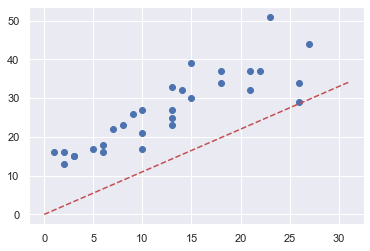

In [24]:
x_range = np.arange(np.max(X)+5)
sns.set()
plt.plot(X,y, "bo")
plt.plot(x_range, tahmin(x_range,w),"r--")
plt.show()

\begin{aligned}
\hat{y} &= x\cdot w + b\;
\end{aligned}

Kayıp fonksiyonu

\begin{aligned}
L = \frac{1}{m}\sum_{i=1}^{m}\left ( \left ( wx_i +b \right )-y_i \right )^{2}
\end{aligned}

In [19]:
def prediction(X,w,b):
    return X*w + b

def compute_loss(X,y,w,b):
    return np.average((prediction(X,w,b)-y)**2)

def train(X, Y, max_iter, learning_rate):
    w = b = 0
    for i in range(max_iter):
        current_loss = compute_loss(X, Y, w, b)
        print("Iterasyon {}: Guncel Kayip: {:.5f}".format(i, current_loss))
        #Ağırlığı (w) güncelleyeceğiz
        if compute_loss(X,Y, w + learning_rate, b) < current_loss:
            w += learning_rate
        elif compute_loss(X,Y, w - learning_rate, b) < current_loss:
            w -= learning_rate
        if compute_loss(X,Y, w, b + learning_rate) < current_loss:
            b += learning_rate
        elif compute_loss(X,Y, w, b - learning_rate) < current_loss:
            b -= learning_rate
        else:
            print("Iterasyon {}: Kayip: {:.5f}".format(i, current_loss))
            return w, b
    raise Exception("{} iterasyonla yakinsamam mümkün olmadi!".format(max_iter)) 

In [20]:
w, b = train(X, y, 10000, 0.01)

Iterasyon 0: Guncel Kayip: 812.86667
Iterasyon 1: Guncel Kayip: 804.28585
Iterasyon 2: Guncel Kayip: 795.75405
Iterasyon 3: Guncel Kayip: 787.27129
Iterasyon 4: Guncel Kayip: 778.83755
Iterasyon 5: Guncel Kayip: 770.45283
Iterasyon 6: Guncel Kayip: 762.11715
Iterasyon 7: Guncel Kayip: 753.83049
Iterasyon 8: Guncel Kayip: 745.59285
Iterasyon 9: Guncel Kayip: 737.40425
Iterasyon 10: Guncel Kayip: 729.26467
Iterasyon 11: Guncel Kayip: 721.17411
Iterasyon 12: Guncel Kayip: 713.13259
Iterasyon 13: Guncel Kayip: 705.14009
Iterasyon 14: Guncel Kayip: 697.19661
Iterasyon 15: Guncel Kayip: 689.30217
Iterasyon 16: Guncel Kayip: 681.45675
Iterasyon 17: Guncel Kayip: 673.66035
Iterasyon 18: Guncel Kayip: 665.91299
Iterasyon 19: Guncel Kayip: 658.21465
Iterasyon 20: Guncel Kayip: 650.56533
Iterasyon 21: Guncel Kayip: 642.96505
Iterasyon 22: Guncel Kayip: 635.41379
Iterasyon 23: Guncel Kayip: 627.91155
Iterasyon 24: Guncel Kayip: 620.45835
Iterasyon 25: Guncel Kayip: 613.05417
Iterasyon 26: Guncel K

Iterasyon 916: Guncel Kayip: 27.13948
Iterasyon 917: Guncel Kayip: 27.11731
Iterasyon 918: Guncel Kayip: 27.09535
Iterasyon 919: Guncel Kayip: 27.07358
Iterasyon 920: Guncel Kayip: 27.05201
Iterasyon 921: Guncel Kayip: 27.03065
Iterasyon 922: Guncel Kayip: 27.00948
Iterasyon 923: Guncel Kayip: 26.98851
Iterasyon 924: Guncel Kayip: 26.96775
Iterasyon 925: Guncel Kayip: 26.94718
Iterasyon 926: Guncel Kayip: 26.92681
Iterasyon 927: Guncel Kayip: 26.90665
Iterasyon 928: Guncel Kayip: 26.88668
Iterasyon 929: Guncel Kayip: 26.86691
Iterasyon 930: Guncel Kayip: 26.84735
Iterasyon 931: Guncel Kayip: 26.82798
Iterasyon 932: Guncel Kayip: 26.80507
Iterasyon 933: Guncel Kayip: 26.78357
Iterasyon 934: Guncel Kayip: 26.76227
Iterasyon 935: Guncel Kayip: 26.74117
Iterasyon 936: Guncel Kayip: 26.72027
Iterasyon 937: Guncel Kayip: 26.69957
Iterasyon 938: Guncel Kayip: 26.67907
Iterasyon 939: Guncel Kayip: 26.65877
Iterasyon 940: Guncel Kayip: 26.63867
Iterasyon 941: Guncel Kayip: 26.61877
Iterasyon 94

In [21]:
w, b

(1.1000000000000008, 12.929999999999769)

In [22]:
prediction(21,w, b)

36.02999999999979

In [ ]:
#x_range = np.arange(np.max(X)+5)
sns.set()
plt.plot(X,y, "bo")
x_edge, y_edge = 30, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, prediction(x_edge,w,b)],"r--")
plt.show()

## Newton-Raphson Metodu

$\sqrt{9.06}$ ifadesinin yaklaşık değerini istiyoruz.

Fonksiyonumuz : $x^2 -9.06=0$
1.Türevimiz : $2*x$


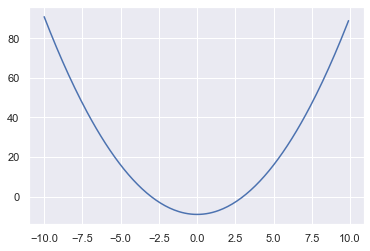

In [25]:
#Fonksiyonumuzu çizdirelim
x = np.arange(-10,10,0.1)
y = x**2 -9.06

plt.plot(x,y)

# Newton kök bulma

    - İlk değer belirle (Xn)
    - Belirli iterasyon sayısınca f hesapla
    - fonksiyon çıktısı durma kriterimden küçükse xn'i döndür
    - xn için fonksiyonun türevindeki değeri hesapla 
    - türevi sıfırdan farklıysa
    - x_n = x_n - f_x_n / df_x_n

In [26]:
def newton_finding(f,f_derivative,initial,stop_criteria,m_iter):
    x_n = initial
    for i in range(0,m_iter):
        f_x_n = f(x_n)
        if abs(f_x_n) < stop_criteria:
            print("iterasyon: {}, deger buldu.".format(i))
            return x_n
        df_x_n = f_derivative(x_n)
        if df_x_n == 0:
            raise Exception("Türevi sıfır!!! Cozum yok.")
        x_n = x_n - f_x_n / df_x_n
    raise Exception("{} iterasyonla yakınsama gerceklesmedi.".format(i))
    

In [27]:
func = lambda x : x**2-9.06
func_derivative = lambda x : 2*x

x_initial = 1
sc = 0.01
max_iteration = 100
x_root = newton_finding(func,func_derivative,x_initial,sc,max_iteration)
x_root

iterasyon: 4, deger buldu.


3.0100789757627617

In [28]:
func(x_root)

0.0005754403289959242

In [29]:
np.sqrt(9.06)

3.0099833886584824

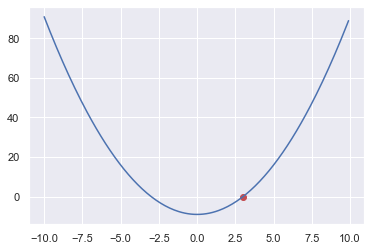

In [30]:
x = np.arange(-10,10,0.1)
y = func(x)
plt.plot(x,y)
plt.scatter(x_root,func(x_root), c = "r")

In [32]:
func = lambda x: x**2 - 9.06
func_derivative = lambda x: 2*x
func_second_derivative = lambda x: 2

x_initial = 1
sc = 0.01
max_iteration = 100

critical_point = newton_finding(func_derivative, func_second_derivative, x_initial, sc, max_iteration)
critical_point

iterasyon: 1, deger buldu.


0.0

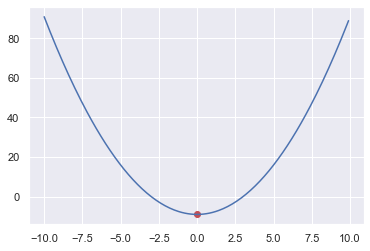

In [34]:
x = np.arange(-10, 10 , 0.1)
y = func(x)
plt.plot(x,y)
plt.scatter(critical_point, func(critical_point), c='r')